In [1]:
import random
from time import perf_counter
import datetime
import retroactive_queue
import matplotlib.pyplot as plt

#batchs = [500, 1000, 1500, 2000, 2500] # batch sizes to test, debugging
batchs =[1000, 3000, 5000, 7000, 9000] # batch sizes to test

n_values = batchs[-1] # number of values to insert in the queue

n_iterations = 4 # number of iterations to average the results, 4 is the most common value in papers

In [2]:
# NOT the best way to generate random datetime objects, but we aren't measuring this, this is just random test data
n_values = batchs[-1]

def generate_random_test_data(n_elements):
    list_datetime = [0]*n_elements
    list_string = [0]*n_elements
    # generate n random datetime objects

    for i in range(n_elements):
        year = random.randint(2000, 2020)
        month = random.randint(1, 12)
        day = random.randint(1, 28)
        hour = random.randint(0, 23)
        minute = random.randint(0, 59)
        second = random.randint(0, 59)
        microsecond = random.randint(0, 999999)

        list_datetime[i] = datetime.datetime(year, month, day, hour, minute, second, microsecond)
    
    # print how many elements duplicates we have
    print("Duplicates: ", len(list_datetime) - len(set(list_datetime)))
    
    # generate n random strings
    for i in range(n_elements):
        list_string[i] = random.randint(0, n_values)
    
    # merge so [time, value]
    for i in range(n_elements):
        list_datetime[i] = [list_datetime[i], list_string[i]]

    return list_datetime

mother_list = generate_random_test_data(n_values)

# sort list by datetime
ordered_list = sorted(mother_list, key=lambda x: x[0])

for i in range(1, 10):
    print(mother_list[i]) # random show

print("")

for i in range(1, 10):
    print(ordered_list[i]) # random show


Duplicates:  0
[datetime.datetime(2006, 3, 23, 5, 15, 53, 386114), 4242]
[datetime.datetime(2003, 10, 26, 15, 31, 39, 323503), 379]
[datetime.datetime(2007, 3, 13, 3, 50, 39, 778828), 3632]
[datetime.datetime(2015, 8, 27, 0, 20, 48, 399638), 5486]
[datetime.datetime(2006, 11, 21, 23, 40, 40, 483671), 5994]
[datetime.datetime(2001, 11, 12, 8, 58, 18, 682061), 2347]
[datetime.datetime(2015, 11, 1, 2, 40, 23, 29247), 6764]
[datetime.datetime(2001, 4, 15, 9, 50, 58, 52281), 962]
[datetime.datetime(2007, 9, 24, 12, 29, 36, 100996), 5958]

[datetime.datetime(2000, 1, 2, 22, 20, 5, 744776), 3439]
[datetime.datetime(2000, 1, 2, 23, 45, 20, 80500), 4488]
[datetime.datetime(2000, 1, 3, 12, 40, 40, 717786), 8334]
[datetime.datetime(2000, 1, 3, 22, 3, 26, 251495), 8865]
[datetime.datetime(2000, 1, 4, 10, 30, 5, 778393), 37]
[datetime.datetime(2000, 1, 4, 15, 24, 15, 606138), 1773]
[datetime.datetime(2000, 1, 4, 17, 16, 3, 657851), 7612]
[datetime.datetime(2000, 1, 4, 23, 26, 4, 763058), 3301]
[dat

In [3]:
def push_performance(batch_size, list, starter_queue_class):
    start = perf_counter()

    for i in range(n_iterations):
        # Create a new queue instance for each iteration
        queue = starter_queue_class(datetime.datetime(2010, 1, 1, 12, 0, 0), "a")
        
        # Push n elements
        for j in range(batch_size):
            queue.push(list[j][0], list[j][1])
        
        # Reset queue
        del queue

    end = perf_counter()

    return (end - start) / n_iterations

def pop_performance(batch_size, list, starter_queue_class):
    start = perf_counter()
    aux = 0

    for i in range(n_iterations):
        # Create a new queue instance for each iteration
        queue = starter_queue_class(datetime.datetime(2010, 1, 1, 12, 0, 0), "a")
        
        # Push n elements to pop later, don't measure this time
        aux1 = perf_counter()
        for j in range(batch_size):
            queue.push(list[j][0], list[j][1])
        # Turn list upside down to pop in reverse order
        list = list[::-1]
        aux2 = perf_counter()
        aux += aux2 - aux1  # Time to push n elements, discard this time

        # Pop n elements
        for j in range(batch_size):
            queue.pop(list[-j][0])
        # Reset queue
        del queue
        
        aux3 = perf_counter()
        # Turn list upside down to pop in reverse order
        list = list[::-1]
        aux4 = perf_counter()
        aux += aux4 - aux3

    end = perf_counter()

    return (end - start - aux) / n_iterations

In [4]:
def evaluate_performance(batchs, list):
    push_results = []
    pop_results = []
    push_results_linked = []
    pop_results_linked = []

    for batch in batchs:
        push_time = push_performance(batch, list, retroactive_queue.queue)
        pop_time = pop_performance(batch, list, retroactive_queue.queue)
        push_time_linked = push_performance(batch, list, retroactive_queue.queue_linked)
        pop_time_linked = pop_performance(batch, list, retroactive_queue.queue_linked)

        push_results.append(push_time)
        pop_results.append(pop_time)
        push_results_linked.append(push_time_linked)
        pop_results_linked.append(pop_time_linked)
        
        print(f"Batch size: {batch}")
    
    return push_results, pop_results, push_results_linked, pop_results_linked

In [5]:
ordered_push_results, ordered_pop_results, ordered_push_results_linked, ordered_pop_results_linked = evaluate_performance(batchs, ordered_list)
disordered_push_results, disordered_pop_results, disordered_push_results_linked, disordered_pop_results_linked = evaluate_performance(batchs, mother_list)

Batch size: 1000
Batch size: 3000
Batch size: 5000
Batch size: 7000
Batch size: 9000
Batch size: 1000
Batch size: 3000
Batch size: 5000
Batch size: 7000
Batch size: 9000


looks like time for pop isn't as good as I thought, definitely has something to do with the inorder traversal search of the tree

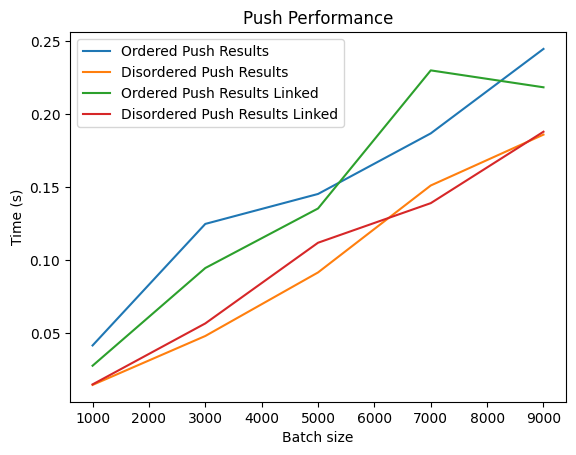

In [6]:
# plot push_results
plt.plot(batchs, ordered_push_results, label="Ordered Push Results")
plt.plot(batchs, disordered_push_results, label="Disordered Push Results")
plt.plot(batchs, ordered_push_results_linked, label="Ordered Push Results Linked")
plt.plot(batchs, disordered_push_results_linked, label="Disordered Push Results Linked")
plt.xlabel("Batch size")
plt.ylabel("Time (s)")
plt.title("Push Performance")
plt.legend()
plt.show()

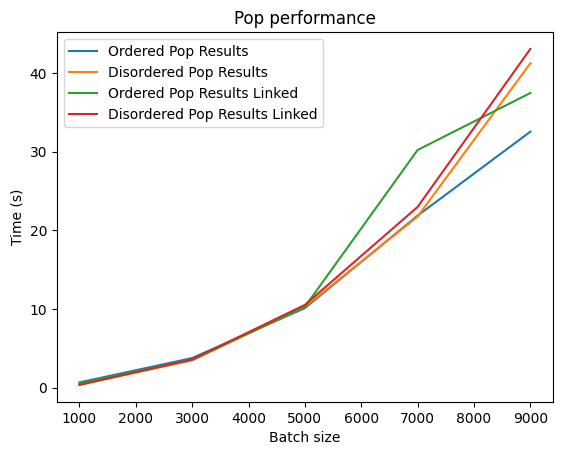

In [7]:
plt.plot(batchs, ordered_pop_results, label="Ordered Pop Results")
plt.plot(batchs, disordered_pop_results, label="Disordered Pop Results")
plt.plot(batchs, ordered_pop_results_linked, label="Ordered Pop Results Linked")
plt.plot(batchs, disordered_pop_results_linked, label="Disordered Pop Results Linked")
plt.xlabel("Batch size")
plt.ylabel("Time (s)")
plt.title("Pop performance")
plt.legend()
plt.show()